## Linear Regression

This notebook will construct data to train linear regression models on that is:
* 1 dim & linear
* multi-dim & linear
* 1 dim & non-linear
* multi-dim & non-linear

We train linear models and models with non-linearities.

## 0. Preliminaries

In [1]:
# Import Statements

import torch
from torch import nn

from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from helper_functions import plot_predictions, plot_loss
from models import LinearRegressionModelV1, train_step_regression, test_step_regression

In [2]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device is {device}")

# random number seed
rns=42

Device is cpu


In [3]:
# Flag to make plots and print out things.
verbose = False

## 1. Create Linear data

* a. Generate it.
* b. split it into train & test
* b. Visualize it. 
* c. Format it into tensors.

In [4]:
# a. Generate data
dims=5
X, y = make_friedman1(n_samples=1000, n_features=dims, noise=0, random_state=rns)

In [5]:
#X.shape, y.shape, coef, type(X), type(y)

In [6]:
# b. Split data into train & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rns)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 5), (200, 5), (800,), (200,))

In [8]:
#X_train[:,0].shape, y_train.shape, X_test[:,0].shape, y_test.shape

In [9]:
# c. Visualize data 
if verbose:
    for dim in range(dims):
        plot_predictions(train_data = X_train[:,dim],
                        train_labels = y_train,
                        test_data = X_test[:,dim],
                        test_labels = y_test
                        )

In [10]:
# d. convert numpy into torch tensors and put them onto device

X_train = torch.from_numpy(X_train).type(torch.float32).to(device)
y_train = torch.from_numpy(y_train).type(torch.float32).to(device)
X_test = torch.from_numpy(X_test).type(torch.float32).to(device)
y_test = torch.from_numpy(y_test).type(torch.float32).to(device)

In [11]:
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [12]:
# Make y_train & y_test dimensions to be same as what model will predict - ie model0(X).

y_train = y_train.unsqueeze(dim=1)
y_test = y_test.unsqueeze(dim=1)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 5]),
 torch.Size([200, 5]),
 torch.Size([800, 1]),
 torch.Size([200, 1]))

## 2. Build and instantiate Model

In [14]:
# models built / defined in models.py

# instantiate model
model0 = LinearRegressionModelV1(in_dim=dims,
                                hid_dim=20,
                                nl_type='relu').to(device) 



In [15]:
if verbose:
    model0.state_dict()

In [16]:
# Make predictions with untrained model and visualize
if verbose:
    with torch.inference_mode():
        preds = model0(X_test)

    for dim in range(dims):
        plot_predictions(train_data = X_train[:,dim],
                        train_labels = y_train,
                        test_data = X_test[:,dim],
                        test_labels = y_test,
                        predictions = preds
                        )

## 3. Train model

In [17]:
# Setup loss function and optimizer
loss_fn = nn.L1Loss() 
# loss_fn = nn.MSELoss() 

optimizer = torch.optim.SGD(params = model0.parameters(),
                            lr = 0.01)

In [18]:
# Setup lists to gather loss through training
epoch_count = []
loss_count = []
test_loss_count = []

epochs = 10000
test_freq = 100

# 1. Loop through all data
for epoch in range(epochs):

    # 2. Training step
    loss = train_step_regression(data = X_train,
                                 labels = y_train,
                                 model = model0,
                                 loss_fn = loss_fn,
                                 optimizer = optimizer)
    
    # 3. print what's happening at test_freq
    if epoch % test_freq == 0:
        
        # 4. Test step
        test_loss = test_step_regression(data = X_test,
                                         labels = y_test,
                                         model = model0,
                                         loss_fn = loss_fn) 
        
        # Collect performance into lists
        epoch_count.append(epoch)
        loss_count.append(loss.item())
        test_loss_count.append(test_loss.item())
        
        # Print performance
        print(f"Epoch: {epoch:5d} | loss: {loss:.6f} | test loss: {test_loss:.6f}")





Epoch:     0 | loss: 13.917582 | test loss: 15.177837
Epoch:   100 | loss: 2.930184 | test loss: 3.252959
Epoch:   200 | loss: 2.568801 | test loss: 2.739693
Epoch:   300 | loss: 2.263861 | test loss: 2.295104
Epoch:   400 | loss: 2.050725 | test loss: 1.961746
Epoch:   500 | loss: 1.925892 | test loss: 1.763397
Epoch:   600 | loss: 1.879081 | test loss: 1.680607
Epoch:   700 | loss: 1.860226 | test loss: 1.661736
Epoch:   800 | loss: 1.846943 | test loss: 1.646662
Epoch:   900 | loss: 1.835853 | test loss: 1.636865
Epoch:  1000 | loss: 1.825832 | test loss: 1.625395
Epoch:  1100 | loss: 1.810221 | test loss: 1.613984
Epoch:  1200 | loss: 1.787195 | test loss: 1.602276
Epoch:  1300 | loss: 1.770474 | test loss: 1.585987
Epoch:  1400 | loss: 1.751665 | test loss: 1.575279
Epoch:  1500 | loss: 1.729101 | test loss: 1.552839
Epoch:  1600 | loss: 1.701137 | test loss: 1.522905
Epoch:  1700 | loss: 1.669214 | test loss: 1.487917
Epoch:  1800 | loss: 1.635048 | test loss: 1.467339
Epoch:  19

## 4. Visualize results

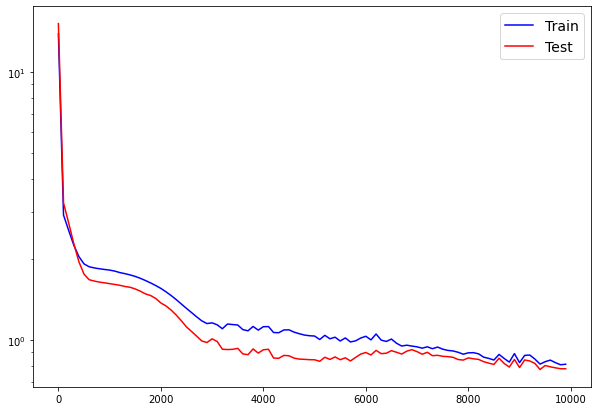

In [22]:
# Plot the loss
plot_loss(epoch = epoch_count,
         loss = loss_count,
         test_loss = test_loss_count,
         y_scale='log')

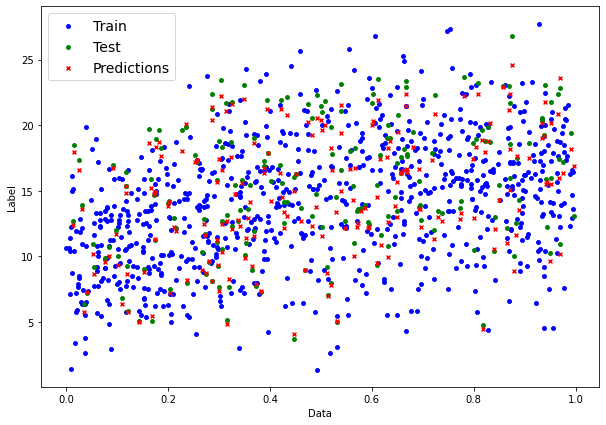

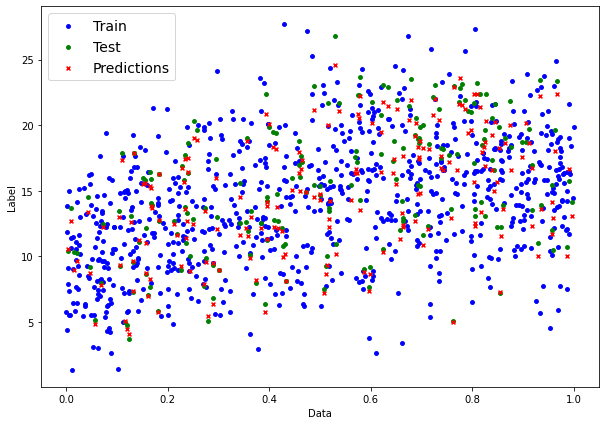

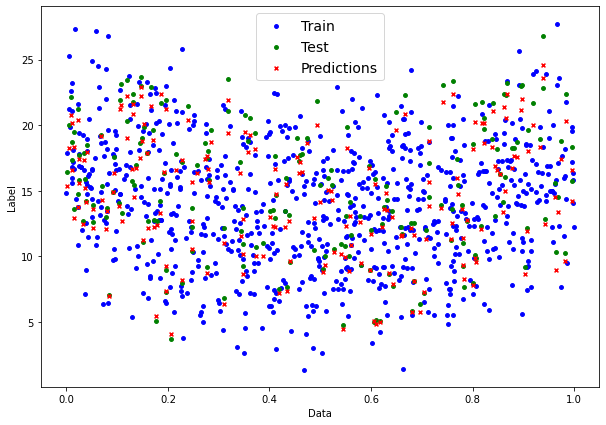

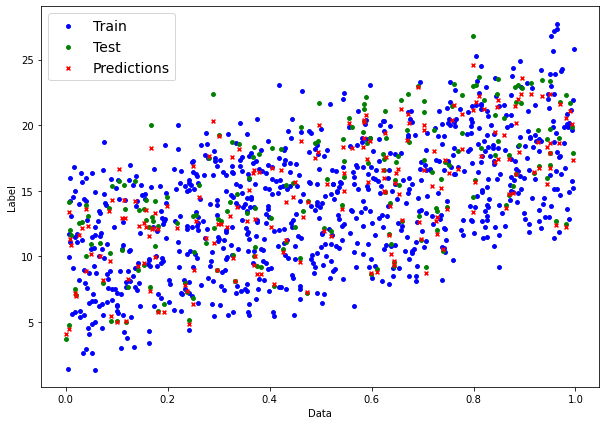

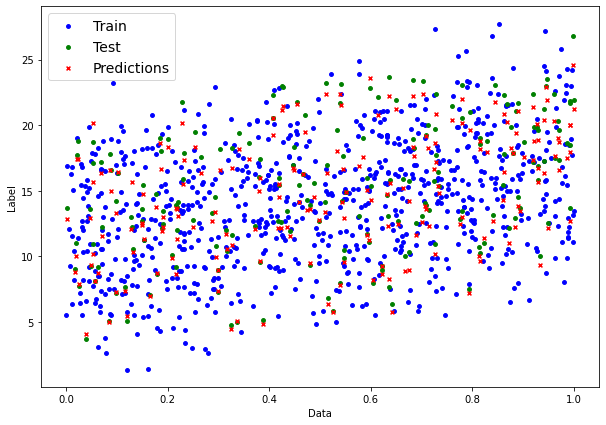

In [20]:
# Make predictions with trained model and visualize
if True:
    with torch.inference_mode():
        preds = model0(X_test)

    for dim in range(dims):
        plot_predictions(train_data = X_train[:,dim],
                        train_labels = y_train,
                        test_data = X_test[:,dim],
                        test_labels = y_test,
                        predictions = preds
                        )

In [21]:
if verbose:
    model0.state_dict()